First 5 rows of the DataFrame:
           movie_title   genre  audience_score  critic_score  release_year  \
0  The Great Adventure  Action              85            70          2018   
1       Laugh Out Loud  Comedy              92            88          2019   
2        Serious Drama   Drama              78            60          2018   
3        Space Odyssey  Sci-Fi              90            95          2020   
4          Action Hero  Action              88            78          2019   

   budget_usd  
0   150000000  
1    50000000  
2    80000000  
3   200000000  
4   120000000  

Data types of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   movie_title     12 non-null     object
 1   genre           12 non-null     object
 2   audience_score  12 non-null     int64 
 3   critic_score    12 non-null     int64 
 4   relea

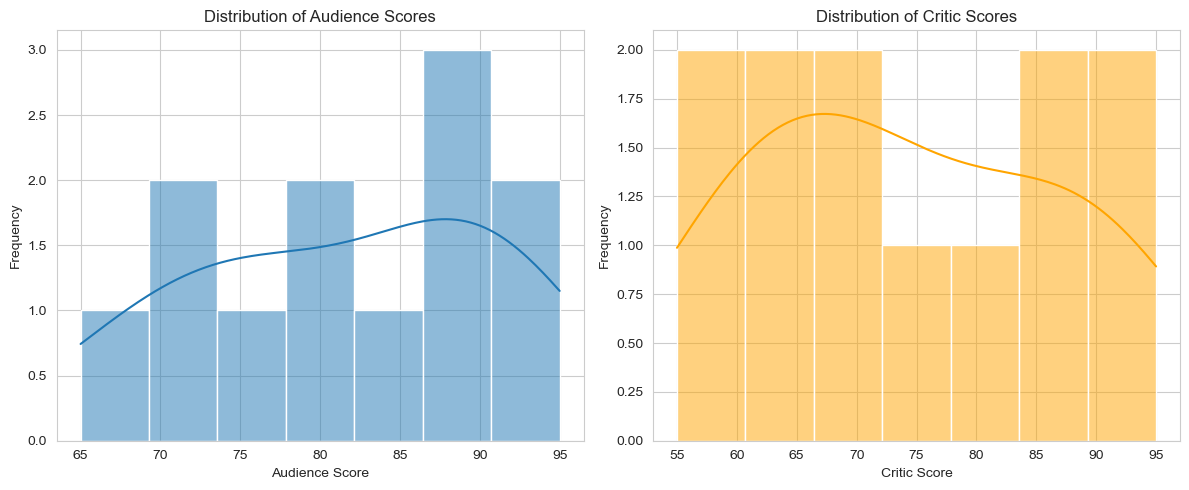

Comments on Distributions:
- Audience scores appear to be generally high, with a concentration around the 75-95 range, indicating positive reception.
- Critic scores show a wider spread, with a noticeable peak in the 60-70 range, suggesting critics might be more discerning or varied in their ratings.


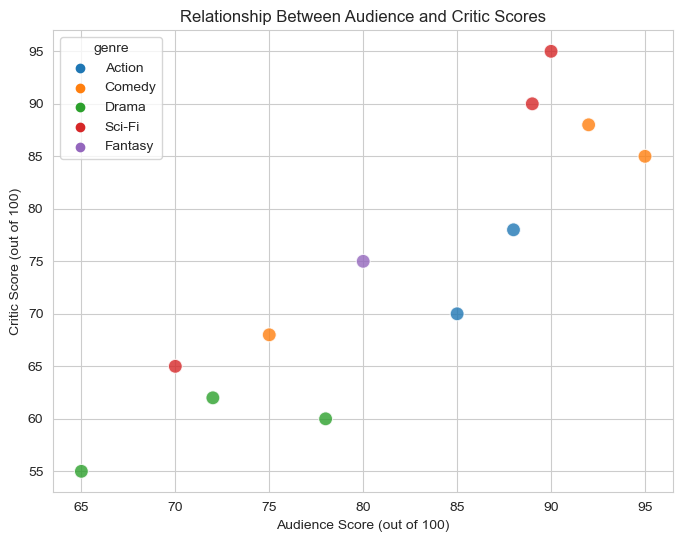


Comments on Relationship:
- There appears to be a general positive correlation: movies with higher audience scores also tend to have higher critic scores, and vice versa.
- However, there are instances where audience and critic scores diverge significantly (e.g., some movies with high audience scores have moderate critic scores, and vice-versa), indicating different perspectives.


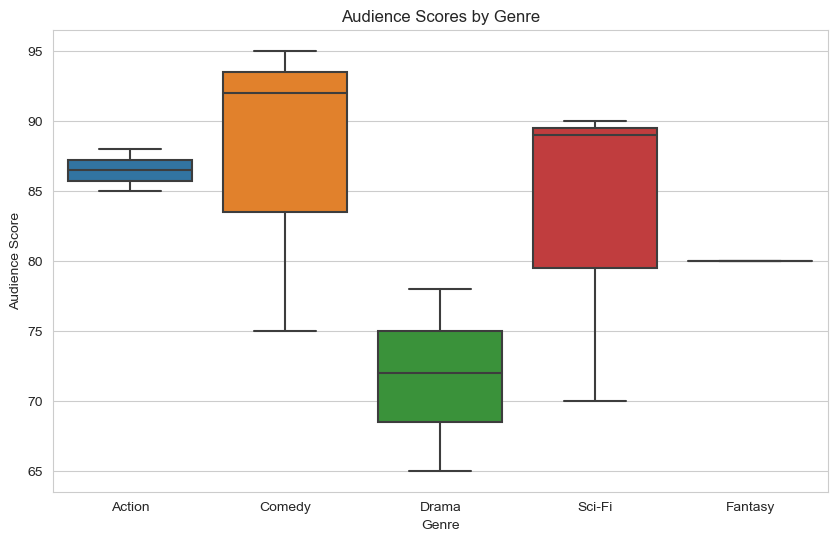


Comments on Scores by Genre:
- Comedy and Sci-Fi genres seem to have generally high audience scores, with Comedy having the highest median and a tight distribution.
- Drama has a lower median audience score and a wider spread, indicating more variability in audience reception for this genre.
- Action and Fantasy also show decent scores, with some variability.


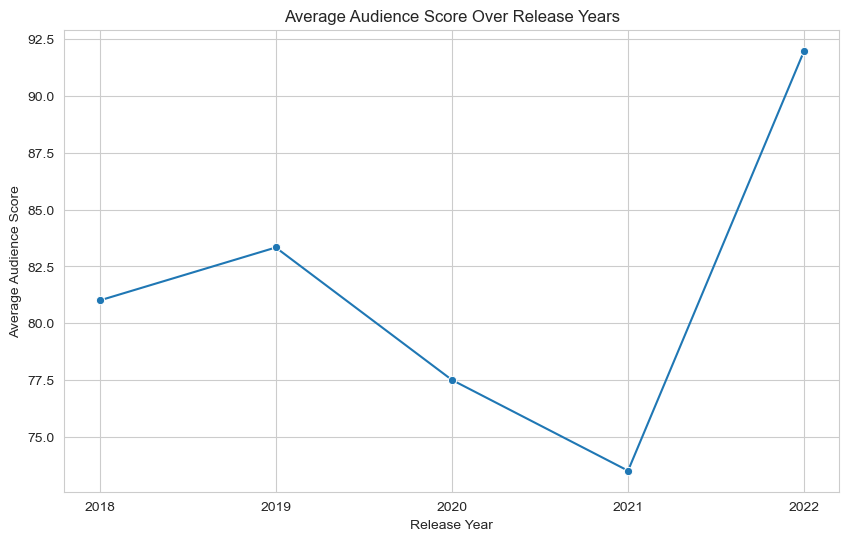

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

data = {
    'movie_title': [
        'The Great Adventure', 'Laugh Out Loud', 'Serious Drama', 'Space Odyssey',
        'Action Hero', 'Romantic Comedy', 'Dark Thriller', 'Fantasy Realm',
        'Sci-Fi Thriller', 'Historical Epic', 'Family Fun', 'Mind Bender'
    ],
    'genre': [
        'Action', 'Comedy', 'Drama', 'Sci-Fi', 'Action', 'Comedy', 'Drama', 'Fantasy',
        'Sci-Fi', 'Drama', 'Comedy', 'Sci-Fi'
    ],
    'audience_score': [85, 92, 78, 90, 88, 75, 65, 80, 89, 72, 95, 70],
    'critic_score': [70, 88, 60, 95, 78, 68, 55, 75, 90, 62, 85, 65],
    'release_year': [2018, 2019, 2018, 2020, 2019, 2021, 2020, 2018, 2022, 2021, 2022, 2019],
    'budget_usd': [150000000, 50000000, 80000000, 200000000, 120000000, 40000000, 70000000, 100000000, 180000000, 90000000, 60000000, 110000000]
}
df = pd.DataFrame(data)

print("First 5 rows of the DataFrame:")
print(df.head())

print("\nData types of each column:")
print(df.info())

print("Descriptive statistics for Audience Score:")
print(df['audience_score'].describe())

print("\nDescriptive statistics for Critic Score:")
print(df['critic_score'].describe())

print("\nChecking for missing values:")
print(df.isnull().sum())

sns.set_style("whitegrid")

plt.figure(figsize=(12, 5))

# Histogram of Audience Scores
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.histplot(df['audience_score'], kde=True, bins=7)
plt.title('Distribution of Audience Scores')
plt.xlabel('Audience Score')
plt.ylabel('Frequency')

# Histogram of Critic Scores
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.histplot(df['critic_score'], kde=True, bins=7, color='orange')
plt.title('Distribution of Critic Scores')
plt.xlabel('Critic Score')
plt.ylabel('Frequency')

plt.tight_layout() # Adjusts plot params for a tight layout
plt.show()

print("Comments on Distributions:")
print("- Audience scores appear to be generally high, with a concentration around the 75-95 range, indicating positive reception.")
print("- Critic scores show a wider spread, with a noticeable peak in the 60-70 range, suggesting critics might be more discerning or varied in their ratings.")

plt.figure(figsize=(8, 6))
sns.scatterplot(x='audience_score', y='critic_score', data=df, hue='genre', s=100, alpha=0.8)
plt.title('Relationship Between Audience and Critic Scores')
plt.xlabel('Audience Score (out of 100)')
plt.ylabel('Critic Score (out of 100)')
plt.grid(True)
plt.show()

print("\nComments on Relationship:")
print("- There appears to be a general positive correlation: movies with higher audience scores also tend to have higher critic scores, and vice versa.")
print("- However, there are instances where audience and critic scores diverge significantly (e.g., some movies with high audience scores have moderate critic scores, and vice-versa), indicating different perspectives.")


plt.figure(figsize=(10, 6))
sns.boxplot(x='genre', y='audience_score', data=df)
plt.title('Audience Scores by Genre')
plt.xlabel('Genre')
plt.ylabel('Audience Score')
plt.show()

print("\nComments on Scores by Genre:")
print("- Comedy and Sci-Fi genres seem to have generally high audience scores, with Comedy having the highest median and a tight distribution.")
print("- Drama has a lower median audience score and a wider spread, indicating more variability in audience reception for this genre.")
print("- Action and Fantasy also show decent scores, with some variability.")


plt.figure(figsize=(10, 6))
# Calculate average audience score per year
avg_score_per_year = df.groupby('release_year')['audience_score'].mean().reset_index()
sns.lineplot(x='release_year', y='audience_score', data=avg_score_per_year, marker='o')
plt.title('Average Audience Score Over Release Years')
plt.xlabel('Release Year')
plt.ylabel('Average Audience Score')
plt.xticks(avg_score_per_year['release_year']) # Ensure all years are shown as ticks
plt.grid(True)
plt.show()